# Project 2
- This project delves into the intriguing connection between condominium market values and population densities.
- The hypothesis is that higher population densities correlate with increased market values.
- By exploring data from New York City's boroughs, this study aims to uncover and illustrate this relationship.

## 1. Prepare Data on Condominium.
## 1-1. Import Data
- This project uses the data on condominium in NYC from <a href = https://data.cityofnewyork.us/City-Government/DOF-Condominium-Comparable-Rental-Income-in-NYC/9ck6-2jew/about_data>NYC Open Data</a>.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Import the data of market values of condominiums.
condominium_full = pd.read_csv('Condominium_NYC.csv')
condominium_full.head()

,Boro-Block-Lot,Condo Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,...,Gross SqFt 3,Estimated Gross Income 3,Gross Income per SqFt 3,Estimated Expense 3,Expense per SqFt 3,Net Operating Income 3,Full Market Value 3,Market Value per SqFt 3,Distance from Condo in miles 2,Report Year
0,1-00576-7501,0003-R1,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70,1966.0,82017,4452703,54.29,...,27108.0,1471693.0,54.29,571708.0,21.09,899985.0,7318000.0,269.96,0.35,2019
1,1-01271-7501,0007-R2,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183,1963.0,141738,7113830,50.19,...,39510.0,1987748.0,50.31,527854.0,13.36,1459894.0,9322000.0,235.94,0.63,2019
2,1-00894-7501,0009-R1,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109,1924.0,158571,7329152,46.22,...,20784.0,960636.0,46.22,374112.0,18.00,586524.0,3423000.0,164.69,0.22,2019
3,1-00631-7501,0018-R1,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20,1910.0,53943,2132906,39.54,...,37064.0,1461804.0,39.44,504070.0,13.60,957734.0,14265000.0,384.87,0.19,2019
4,1-00868-7501,0019-R1,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113,1961.0,88230,4288860,48.61,...,41603.0,2022322.0,48.61,497572.0,11.96,1524750.0,7628000.0,183.35,0.22,2019


## 1-2. Add Borough Names
- Add borough names because this data only has Boro-Block-Lot numbers.

In [6]:
# Select only necessayr columns.
condominium = condominium_full[['Boro-Block-Lot', 'Report Year', 'Market Value per SqFt']]

In [52]:
# Add borough names from Boro-Block-Lot numbers.
def convert(df):
    boroughs = []
    for i in range(len(df)):
        if df['Boro-Block-Lot'].iloc[i][0] == '1':
            boroughs.append('Manhattan')
        elif df['Boro-Block-Lot'].iloc[i][0] == '2':
            boroughs.append('Brooklyn')
        elif df['Boro-Block-Lot'].iloc[i][0] == '3':
            boroughs.append('Queens')
        elif df['Boro-Block-Lot'].iloc[i][0] == '4':
            boroughs.append('Bronx')
        elif df['Boro-Block-Lot'].iloc[i][0] == '5':
            boroughs.append('Staten Island')
        else:
            boroughs.append('NaN')
    return boroughs

condominium.loc[:, 'Borough'] = convert(condominium).copy()

condominium[['Boro-Block-Lot','Borough']].sample(5)

,Boro-Block-Lot,Borough
3771,3-00336-7501,Queens
6214,1-01203-7502,Manhattan
17019,3-02563-7502,Queens
23503,1-02180-7503,Manhattan
25595,5-00610-7502,Staten Island


## 1-3. Group Data Necessary for Analysis.
- Show the average of market values per square feet in each borough and year.
- Additionally, as this data sets have many colums, picks up necessary columns.

In [9]:
# Group the data by 'Borough' and 'Report Year' with the average of market values per square feet.
group_condo = condominium.groupby(
    ['Borough', 'Report Year'])['Market Value per SqFt'].mean().reset_index()
group_condo.head()

,Borough,Report Year,Market Value per SqFt
0,Bronx,2012,76.445659
1,Bronx,2013,83.238770
2,Bronx,2014,88.407791
3,Bronx,2015,97.022680
4,Bronx,2016,114.381622


## 2. Visualize Market Values of Condominiums.
- Show the market values of condominiums by borough.
- Show the market values of condominiums by year.

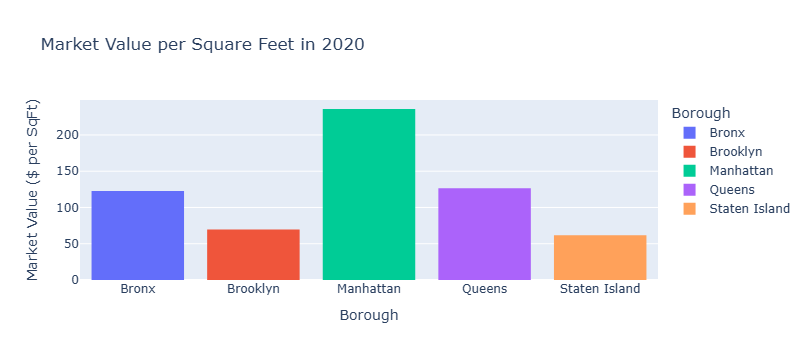

In [84]:
# Condominiums' market values of each borough in 2020
fig = px.histogram(
        group_condo[group_condo['Report Year']==2020],
        x="Borough",
        y="Market Value per SqFt",
        color='Borough',
        title='Market Value per Square Feet in 2020',
)

fig.update_yaxes(title_text='Market Value ($ per SqFt)')
fig.update_layout(width=700)
fig.show()

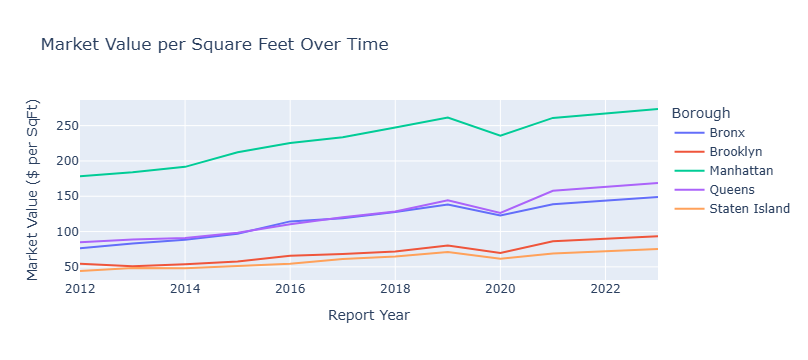

In [82]:
# Condominiums' market values of each borough over time
fig = px.line(
        group_condo,
        x="Report Year",
        y="Market Value per SqFt",
        color='Borough',
        title='Market Value per Square Feet Over Time',
)

fig.update_yaxes(title_text='Market Value ($ per SqFt)')
fig.update_layout(width=700)
fig.show()

## 3. Takeaways of Market Values of Condominiums.
- From a spatial perspective, market values are typically highest in Manhattan, followed by Queens, the Bronx, Brooklyn, and Staten Island.
- Interestingly, in 2016, the Bronx briefly surpassed Queens in market value.
- Over time, these values have generally been on the rise.
- However, in 2020, all boroughs saw a temporary dip in their market values.

## 4. Prepare Data on Population Density.
## 4-1. Import Data
- This project uses the data on population condominium in NYC from <a href = https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9/about_data>NYC Open Data</a> and data on areas of boroughs in NYC from <a href = https://www.baruch.cuny.edu/nycdata/population-geography/pop-landarea.htm>Baruch College</a>.

In [15]:
# Import population data.
population = pd.read_csv('Population_NYC.csv')
population

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,443728,5.54,468730,5.69,487155,5.70,497749,5.64,501109,5.55


In [16]:
# Import area data.
area = pd.read_excel('NY_Area.xls')
area

,Borough,Area
0,Bronx,42.10
1,Brooklyn,70.82
2,Manhattan,22.83
3,Queens,108.53
4,Staten Island,58.37


## 4-2. Clean Colum of Borough in Population Data.
- The colum of Borough in population data has some excessive spaces.
- The data on population has many colums.
- Make clean and pick up necessary data.

In [18]:
# Replace borough names with the correct ones.

clean_population = (
    population[population['Borough'] != 'NYC Total']
    [['Borough', '2010', '2020']]
    .reset_index(drop=True)
    .copy()
)

    
clean_population.loc[0, 'Borough'] = 'Bronx'
clean_population.loc[1, 'Borough'] = 'Brooklyn'
clean_population.loc[2, 'Borough'] = 'Manhattan'
clean_population.loc[3, 'Borough'] = 'Queens'
clean_population.loc[4, 'Borough'] = 'Staten Island'

clean_population

,Borough,2010,2020
0,Bronx,1385108,1446788
1,Brooklyn,2552911,2648452
2,Manhattan,1585873,1638281
3,Queens,2250002,2330295
4,Staten Island,468730,487155


## 4-3. Combine Population and Area Data
- To calculate population density data, combine both population and area data in one data frame.

In [20]:
# Combine population and area data.

population_select = pd.merge(
    area, 
    clean_population[['Borough', '2010', '2020']], 
    on='Borough', 
    how='left'
)

population_select

,Borough,Area,2010,2020
0,Bronx,42.10,1385108,1446788
1,Brooklyn,70.82,2552911,2648452
2,Manhattan,22.83,1585873,1638281
3,Queens,108.53,2250002,2330295
4,Staten Island,58.37,468730,487155


## 4-4. Calculate Population Density.
- Determine the population density by dividing the population by the area.

In [22]:
# Calculate population density.

population_2010 = population_select.copy()
population_2010['Report Year'] = 2010
population_2010['Density'] = population_2010['2010']/population_2010['Area']

population_2020 = population_select.copy()
population_2020['Report Year'] = 2020
population_2020['Density'] = population_2020['2020']/population_2020['Area']

density = pd.concat([population_2010, population_2020])

density_clean = density.drop(
    ['Area', '2010', '2020'], axis=1).copy()

density_clean

,Borough,Report Year,Density
0,Bronx,2010,32900.427553
1,Brooklyn,2010,36047.881954
2,Manhattan,2010,69464.432764
3,Queens,2010,20731.613379
4,Staten Island,2010,8030.323796
0,Bronx,2020,34365.510689
1,Brooklyn,2020,37396.950014
2,Manhattan,2020,71760.008760
3,Queens,2020,21471.436469
4,Staten Island,2020,8345.982525


## 5. Visualize Market Values of Population Density.
- Show the population density by borough.
- Show the population density by year.

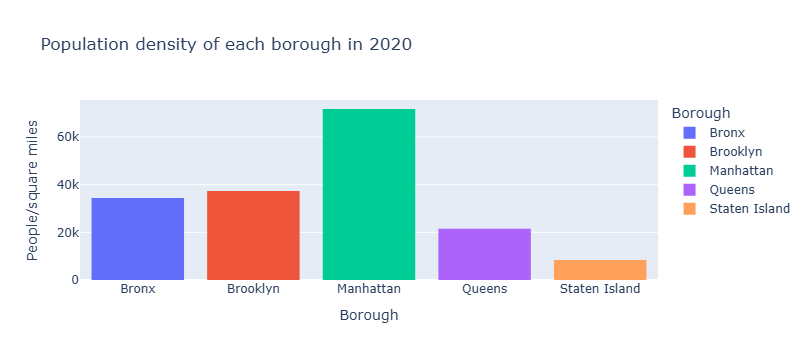

In [72]:
# Population density of each borough in 2020
fig = px.histogram(
    density_clean[density_clean['Report Year']==2020],
    x="Borough",
    y="Density",
    color='Borough',
    title='Population density of each borough in 2020',
)

fig.update_yaxes(title_text='People/square miles')
fig.update_layout(width=700)
fig.show()

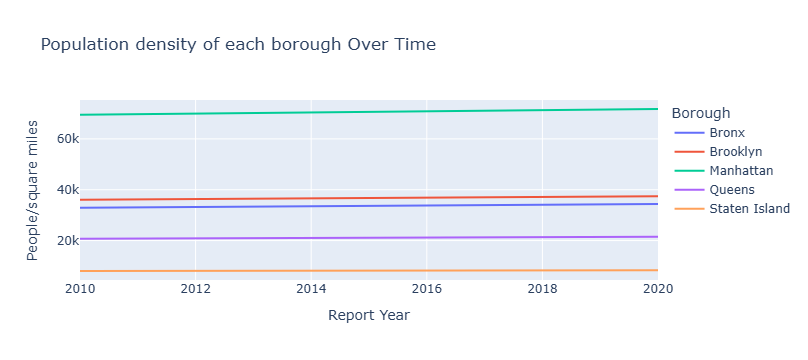

In [74]:
# Population density of each borough over time
fig = px.line(
        density_clean,
        x="Report Year",
        y="Density",
        color='Borough',
        title='Population density of each borough Over Time',
)

fig.update_yaxes(title_text='People/square miles')
fig.update_layout(width=700)
fig.show()

## 6. Takeaways of Population Density of Condominiums.
- Spatially, population densities are highest in Manhattan, followed by Brooklyn, the Bronx, Queens, and Staten Island.
- Over time, population densities have been steadily increasing across all boroughs.

## 7. Compare Two Data.
## 7-1. Combine Two Data.
- Combine both market values of condominiums and population densities data in 2020.

In [28]:
# Combine market value and population densities.

df_merged = pd.merge(group_condo[group_condo['Report Year']==2020], 
                     density_clean[density_clean['Report Year']==2020],
                     on=['Borough', 'Report Year'], how='left')
df_merged

,Borough,Report Year,Market Value per SqFt,Density
0,Bronx,2020,122.795596,34365.510689
1,Brooklyn,2020,69.586522,37396.950014
2,Manhattan,2020,235.772473,71760.008760
3,Queens,2020,126.448726,21471.436469
4,Staten Island,2020,61.571111,8345.982525


## 7-2. Visualize Comparisons between Two Data.
- Show market values of condominiums and population densities by borough in 2020.- Show scatter plots between population densities and market values.
- Show trends of population density and market value data by year. .

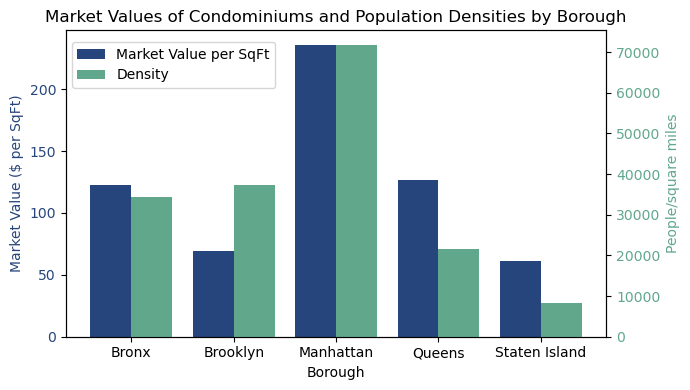

In [88]:
# Compare market values of condominiums and population densities in 2020
import numpy as np

fig, ax1 = plt.subplots(figsize=(7, 4))

x = np.arange(len(df_merged['Borough']))

bar1 = ax1.bar(x - 0.2, 
               df_merged['Market Value per SqFt'],
               width=0.4, 
               label='Market Value per SqFt', 
               color='#26457C')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Market Value ($ per SqFt)', color='#26457C')
ax1.tick_params(axis='y', labelcolor='#26457C')

ax2 = ax1.twinx()
bar2 = ax2.bar(x + 0.2, 
               df_merged['Density'], 
               width=0.4, 
               label='Density', 
               color='#61A78C')
ax2.set_ylabel('People/square miles', color='#61A78C')
ax2.tick_params(axis='y', labelcolor='#61A78C')

ax1.set_xticks(x)
ax1.set_xticklabels(df_merged['Borough'])

plt.title('Market Values of Condominiums and Population Densities by Borough')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

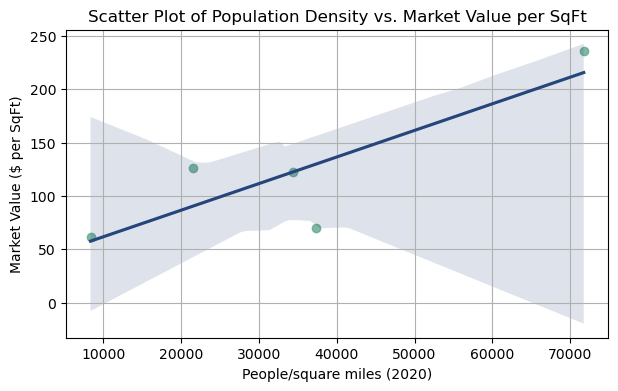

In [94]:
# Show scatter plots between population densities and market values.
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.regplot(x='Density',
            y='Market Value per SqFt',
            data=df_merged, 
            scatter_kws={'color':'#61A78C'}, 
            line_kws={'color':'#26457C'})
plt.xlabel('People/square miles (2020)')
plt.ylabel('Market Value ($ per SqFt)')
plt.title('Scatter Plot of Population Density vs. Market Value per SqFt')
plt.grid(True)
plt.show()

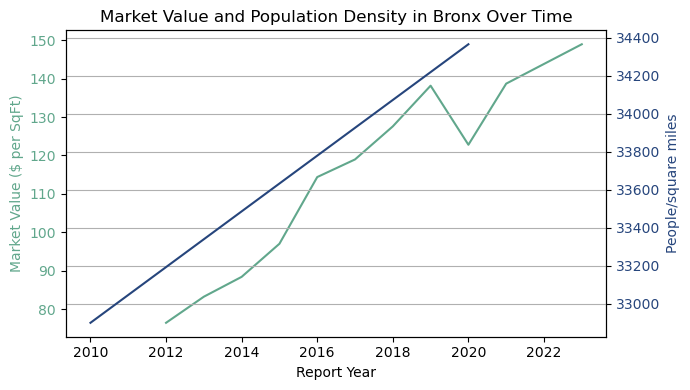

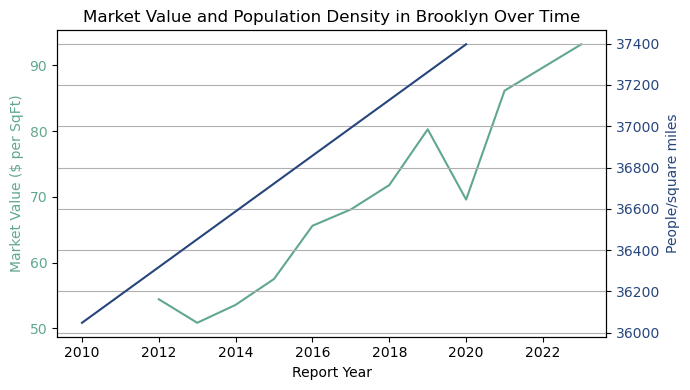

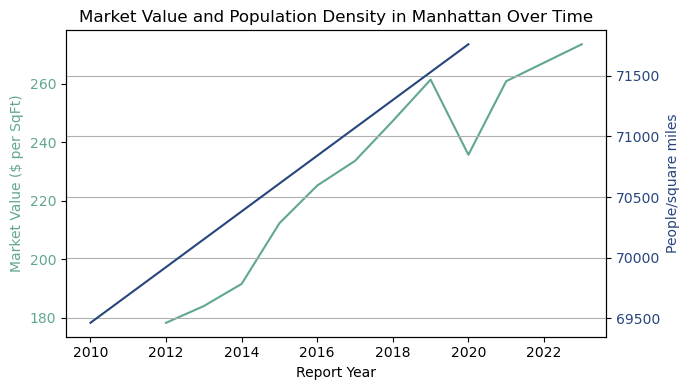

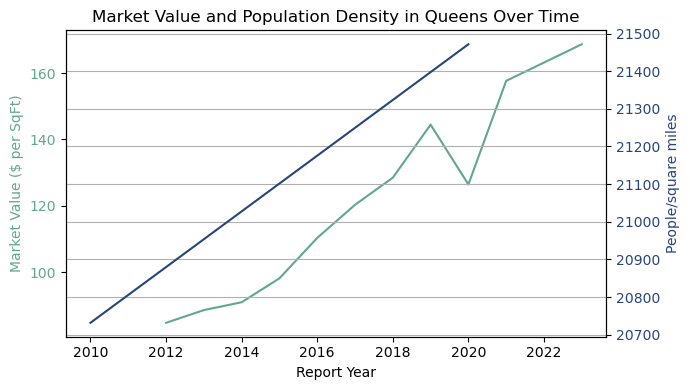

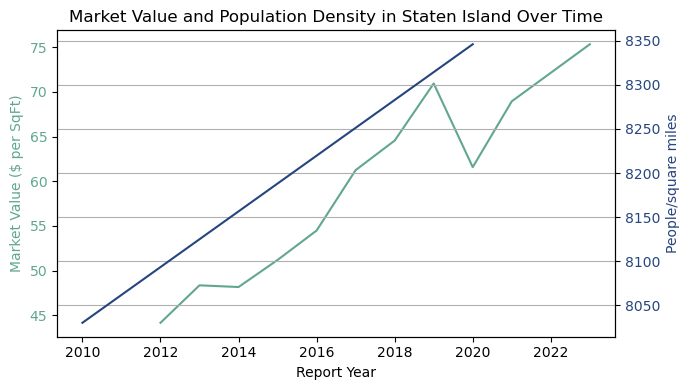

In [96]:
# Show trends of population density and market value data by year. 
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

for borough in boroughs:
    fig, ax1 = plt.subplots(figsize=(7, 4))

    ax1.plot(group_condo[group_condo['Borough']==borough]['Report Year'],
        group_condo[group_condo['Borough']==borough]['Market Value per SqFt'],
        color='#61A78C', label='Market Value per SqFt')
    ax1.set_xlabel('Report Year')
    ax1.set_ylabel('Market Value ($ per SqFt)', color='#61A78C')
    ax1.tick_params(axis='y', labelcolor='#61A78C')

    ax2 = ax1.twinx()
    ax2.plot(density_clean[density_clean['Borough']==borough]['Report Year'],
             density_clean[density_clean['Borough']==borough]['Density'],
             color='#26457C', label='Population Density')
    ax2.set_ylabel('People/square miles', color='#26457C')
    ax2.tick_params(axis='y', labelcolor='#26457C')

    plt.title(f'Market Value and Population Density in {borough} Over Time')
    fig.tight_layout()
    plt.grid(True)
    
    plt.show()

## 8. Takeaways of Comparisons
### Hypothesis
- Larger population densities is associated with higher market values for condominiums, as shown by the histogram, scatter plot, and trend lines.
- For example, Manhattan, with the highest density, has the highest market value, while Staten Island, with the lowest density, has the lowest market value.
- The scatter plot also suggests a positive relationship between population density and market value.
- Additionally, both market value and population density trends are increasing.

### Limitations
- However, there are exceptions and limitations to this hypothesis.
- The association is not clear when looking only at Bronx, Brooklyn, and Queens alone.
- This suggests other factors, like building quality, may influence market values.
- The study uses a small dataset (five boroughs), so the association may not be statistically significant.
- Population density trend lines only include data for 2010 and 2020, limiting detailed yearly trend analysis.

### Improvement
- It would be beneficial to include more variables, expand data beyond NYC to other major U.S. cities, and incorporate annual population density data.